### Task 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch

In [2]:
np.random.seed(45)
num_samples = 40
    
# Generate data
x1 = np.random.uniform(-1, 1, num_samples)
f_x = 3*x1 + 4
eps = np.random.randn(num_samples)
y = f_x + eps

In [3]:
# Defining the linear regression function
def linear_regression(x, theta0, theta1):
    return theta1 * x + theta0

# Defining the loss function
def loss_function(y_pred, y):
    return ((y_pred - y) ** 2).mean()

#### Q1

For calculating the true gradient we are choosing $\theta_0 = 3$ and $\theta_1 = 4$

In [4]:
x_tensor = torch.tensor(x1)
y_tensor = torch.tensor(y)

# Initializing theta values
theta0 = torch.tensor(3, dtype=torch.float64, requires_grad=True)
theta1 = torch.tensor(4, dtype=torch.float64, requires_grad=True)


# Forward pass: compute predictions and loss
y_pred = linear_regression(x_tensor, theta0, theta1)
loss = loss_function(y_pred, y_tensor)

# Computes gradient at theta0 = 3 and theta1 = 4
loss.backward()

print(f"True Gradient of θ0: {theta0.grad.item()}")
print(f"True Gradient of θ1: {theta1.grad.item()}")


True Gradient of θ0: -2.124577346584111
True Gradient of θ1: 0.9932962799574627


#### Q2

We will now take the same $(\theta_0, \theta_1)$ pair and now calculate gradient for all the points. After calculating them, we will be taking the mean of all the points, which means we are now calculating the resultant vector of all the vectors obtained at every point and try to show that the final gradient vector is going to be nearly equal to the true vector which we had calculated in the previous question.

In [5]:
# Lists to store gradient value at each xi, yi pair
stochastic_grad0 = []
stochastic_grad1 = []

# Intializing theta values
stochastic_theta0 = torch.tensor(3, dtype=torch.float32, requires_grad=True)
stochastic_theta1 = torch.tensor(4, dtype=torch.float32, requires_grad=True)

# Calculating gradient for each xi, yi pair and storing it in the list
for xi,yi in zip(x_tensor,y_tensor):
    #resetting gradients to prevent accumulation of gradients
    stochastic_theta0.grad = None
    stochastic_theta1.grad = None

    stocastic_y_pred = linear_regression(xi,stochastic_theta0,stochastic_theta1)
    stocastic_loss = loss_function(stocastic_y_pred, yi)

    stocastic_loss.backward()
    stochastic_grad0.append(stochastic_theta0.grad.item())
    stochastic_grad1.append(stochastic_theta1.grad.item())


stochastic_grad0 = np.array(stochastic_grad0)
stochastic_grad1 = np.array(stochastic_grad1)

print(stochastic_grad0.mean())
print(stochastic_grad1.mean())

-2.124577349051833
0.9932962742401287


So we can see that the components of the vector obtained by taking the average comes out to be nearly equal. Hence, we can conclude that stochastic gradient is a good estimate of the true gradient.

### Q3

Before starting with the implementation, we need to find out what is the optimal values of loss. This will help us decide when to stop the algorithm. In order to find the optimal loss, we will take the help of Normal Equation. The implementation is given below.

In [72]:
# Computing optimal theta using the normal equation
X_bias = np.hstack([np.ones_like(x1), x1])
theta_optimal = np.linalg.inv(X_bias.T @ X_bias) @ (X_bias.T @ y)
y_pred_optimal = X_bias @ theta_optimal
optimal_loss = loss_function(y_pred_optimal, y)

#### Implementation of Full-batch Gradient Descent

Descent stopped at epoch = 368
Final Theta0: 3.9439
Final Theta1: 2.6265
Descent stopped at epoch = 373
Final Theta0: 3.9575
Final Theta1: 2.7379
Descent stopped at epoch = 298
Final Theta0: 3.9574
Final Theta1: 2.7380
Descent stopped at epoch = 413
Final Theta0: 3.9439
Final Theta1: 2.6267
Descent stopped at epoch = 291
Final Theta0: 3.9439
Final Theta1: 2.6270
Descent stopped at epoch = 294
Final Theta0: 3.9438
Final Theta1: 2.6264
Descent stopped at epoch = 349
Final Theta0: 3.9575
Final Theta1: 2.7384
Descent stopped at epoch = 422
Final Theta0: 3.9439
Final Theta1: 2.6268
Descent stopped at epoch = 398
Final Theta0: 3.9439
Final Theta1: 2.6265
Descent stopped at epoch = 326
Final Theta0: 3.9439
Final Theta1: 2.6265
Average No. of Epochs:  354.2
Average No. of Iterations:  354.2


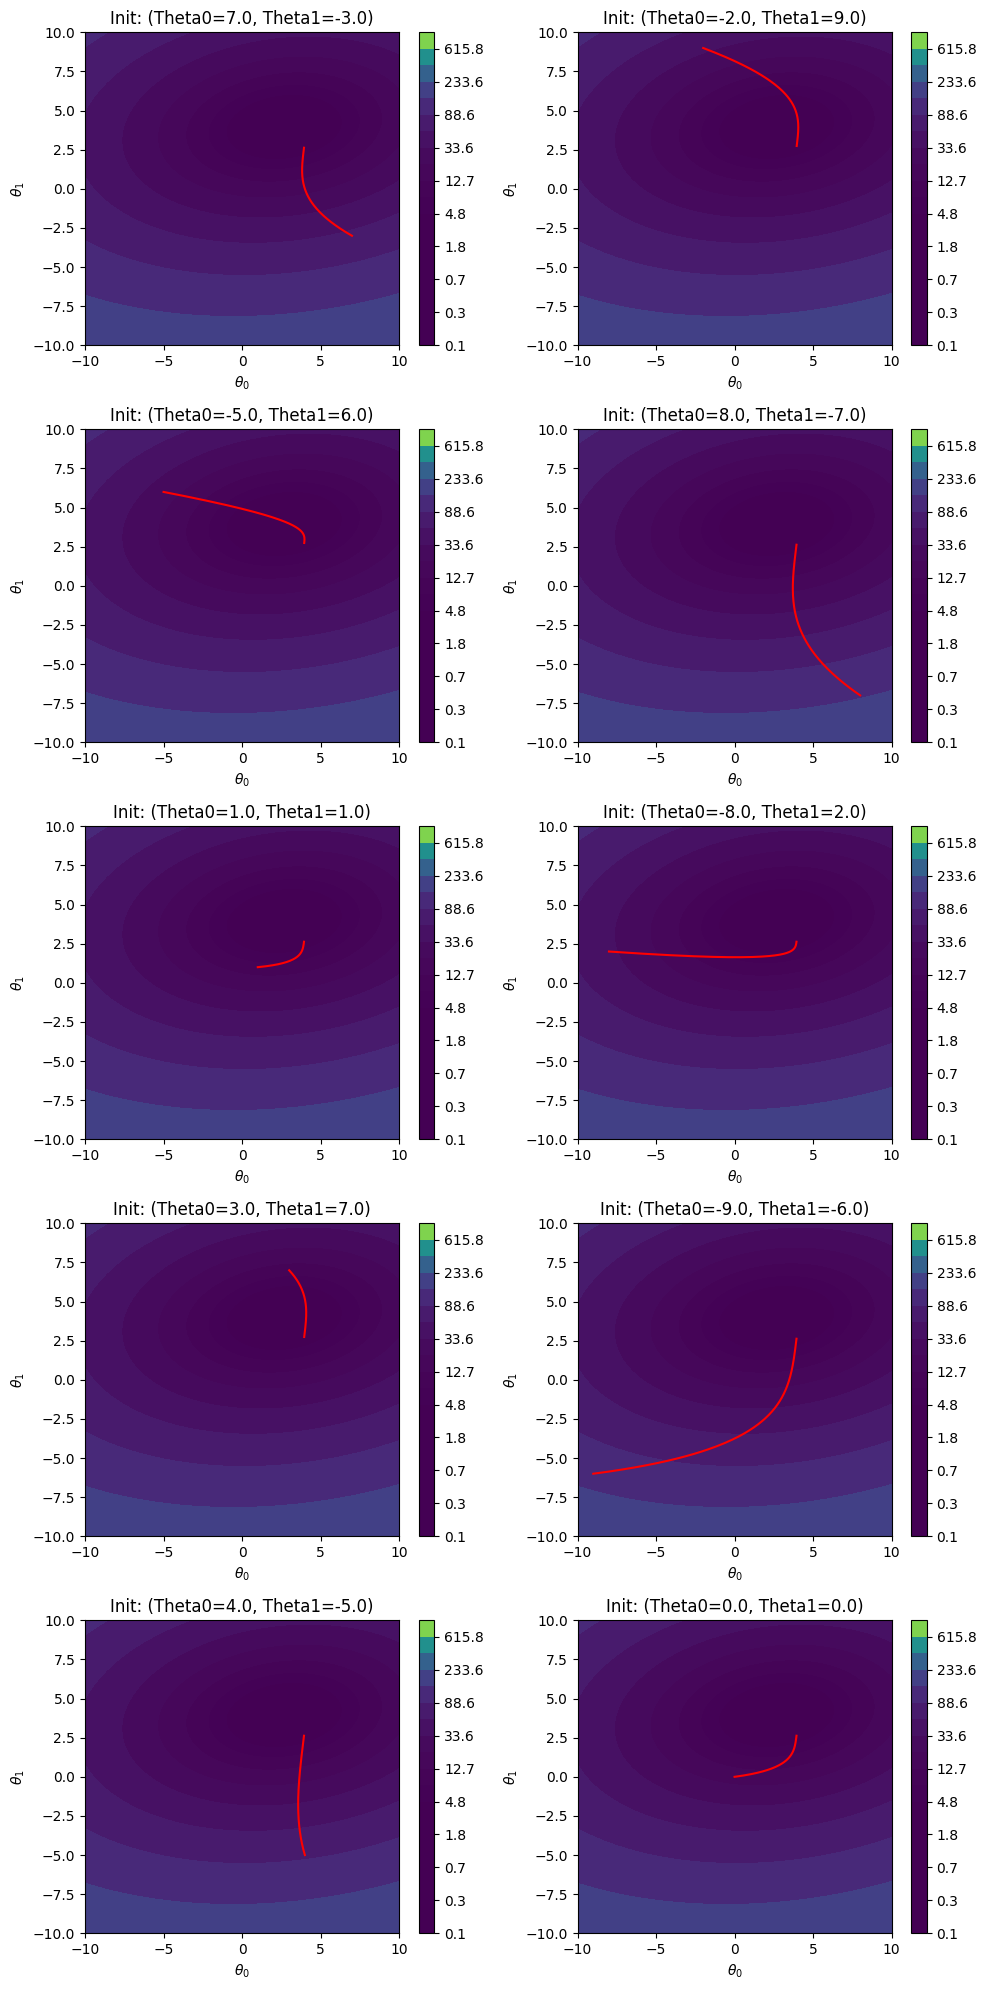

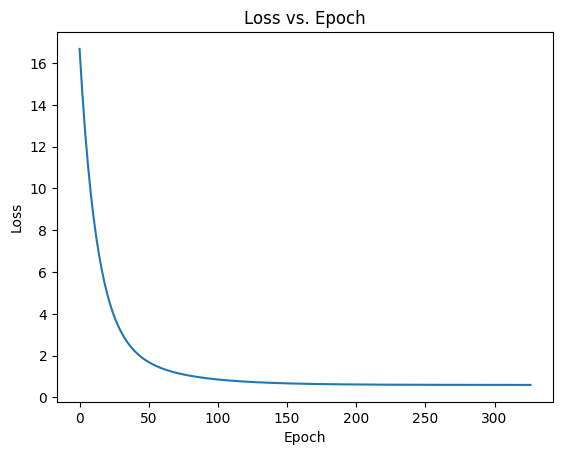

In [67]:
# Converting to column vectors
x1 = x1.reshape(-1, 1)
y = y.reshape(-1, 1)

# Preparing the loss function contour plot
all_theta0 = np.linspace(-10, 10, 100)
all_theta1 = np.linspace(-10, 10, 100)
loss_vals = np.zeros((100, 100))

for i in range(100):
    for j in range(100):
        y_pred = linear_regression(x1, all_theta0[i], all_theta1[j])
        loss_vals[i, j] = loss_function(y_pred, y)


theta_tuples = [
    (7.0, -3.0), (-2.0, 9.0), (-5.0, 6.0), (8.0, -7.0), (1.0, 1.0), 
    (-8.0, 2.0), (3.0, 7.0), (-9.0, -6.0), (4.0, -5.0), (0.0, 0.0)
]

epoch_list = []
iteration_list = []

# Creating 5x2 grid of subplots
fig, axes = plt.subplots(5, 2, figsize=(10, 20))
axes = axes.flatten()  # Flattening the 2D array of axes for easier iteration

for idx, (theta0, theta1) in enumerate(theta_tuples):
    
    learning_rate = 0.02
    epochs = 500

    losses_full = []
    theta0_values = [theta0]
    theta1_values = [theta1]
    
    total_iterations = 0  
    epoch_count = 0

    for epoch in range(epochs):
        
        epoch_count += 1
        y_pred = linear_regression(x1, theta0, theta1)
        
        loss = loss_function(y_pred, y)
        losses_full.append(loss)
        
        # Calculating gradients
        error = y_pred - y
        grad_theta0 = (2 / num_samples) * np.sum(error)
        grad_theta1 = (2 / num_samples) * np.sum((error) * x1)
        
        # Updating theta values
        theta0 -= learning_rate * grad_theta0
        theta1 -= learning_rate * grad_theta1
        
        theta0_values.append(theta0)
        theta1_values.append(theta1)
        
        total_iterations += 1 
        
        # Stopping condition
        if abs(loss - optimal_loss) < 0.001:
            break
            
    print(f'Descent stopped at epoch = {epoch}')
    print(f'Final Theta0: {theta0:.4f}')
    print(f'Final Theta1: {theta1:.4f}')
    
    epoch_list.append(epoch_count)
    iteration_list.append(total_iterations)  # Save iteration count for the current tuple
    
    # Contour Plot
    contour_filled = axes[idx].contourf(all_theta0, all_theta1, loss_vals, levels=np.logspace(-1, 3, 20), cmap='viridis')
    fig.colorbar(contour_filled, ax=axes[idx]) 

    # Plotting gradient descent path
    axes[idx].plot(theta0_values, theta1_values, 'r-', label='Gradient Descent Path')
    axes[idx].set_xlabel(r'$\theta_0$')
    axes[idx].set_ylabel(r'$\theta_1$')
    axes[idx].set_title(f'Init: (Theta0={theta_tuples[idx][0]}, Theta1={theta_tuples[idx][1]})')


avg_epochs = np.average(epoch_list)
avg_iterations = np.average(iteration_list)

print("Average No. of Epochs: ", avg_epochs)
print("Average No. of Iterations: ", avg_iterations)

plt.tight_layout()
plt.show()

# Plotting Loss vs. Epoch
plt.plot(losses_full)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs. Epoch')
plt.show()


#### Implementation of Mini-batch Gradient Descent

Descent stopped at epoch = 92
Final Theta0: 3.9452
Final Theta1: 2.6258
Descent stopped at epoch = 93
Final Theta0: 3.9569
Final Theta1: 2.7384
Descent stopped at epoch = 75
Final Theta0: 3.9566
Final Theta1: 2.7377
Descent stopped at epoch = 104
Final Theta0: 3.9430
Final Theta1: 2.6278
Descent stopped at epoch = 73
Final Theta0: 3.9413
Final Theta1: 2.6277
Descent stopped at epoch = 74
Final Theta0: 3.9417
Final Theta1: 2.6285
Descent stopped at epoch = 88
Final Theta0: 3.9584
Final Theta1: 2.7368
Descent stopped at epoch = 106
Final Theta0: 3.9477
Final Theta1: 2.6268
Descent stopped at epoch = 100
Final Theta0: 3.9453
Final Theta1: 2.6274
Descent stopped at epoch = 82
Final Theta0: 3.9439
Final Theta1: 2.6279
Average No. of epochs:  88.7
Average No. of iterations:  354.8


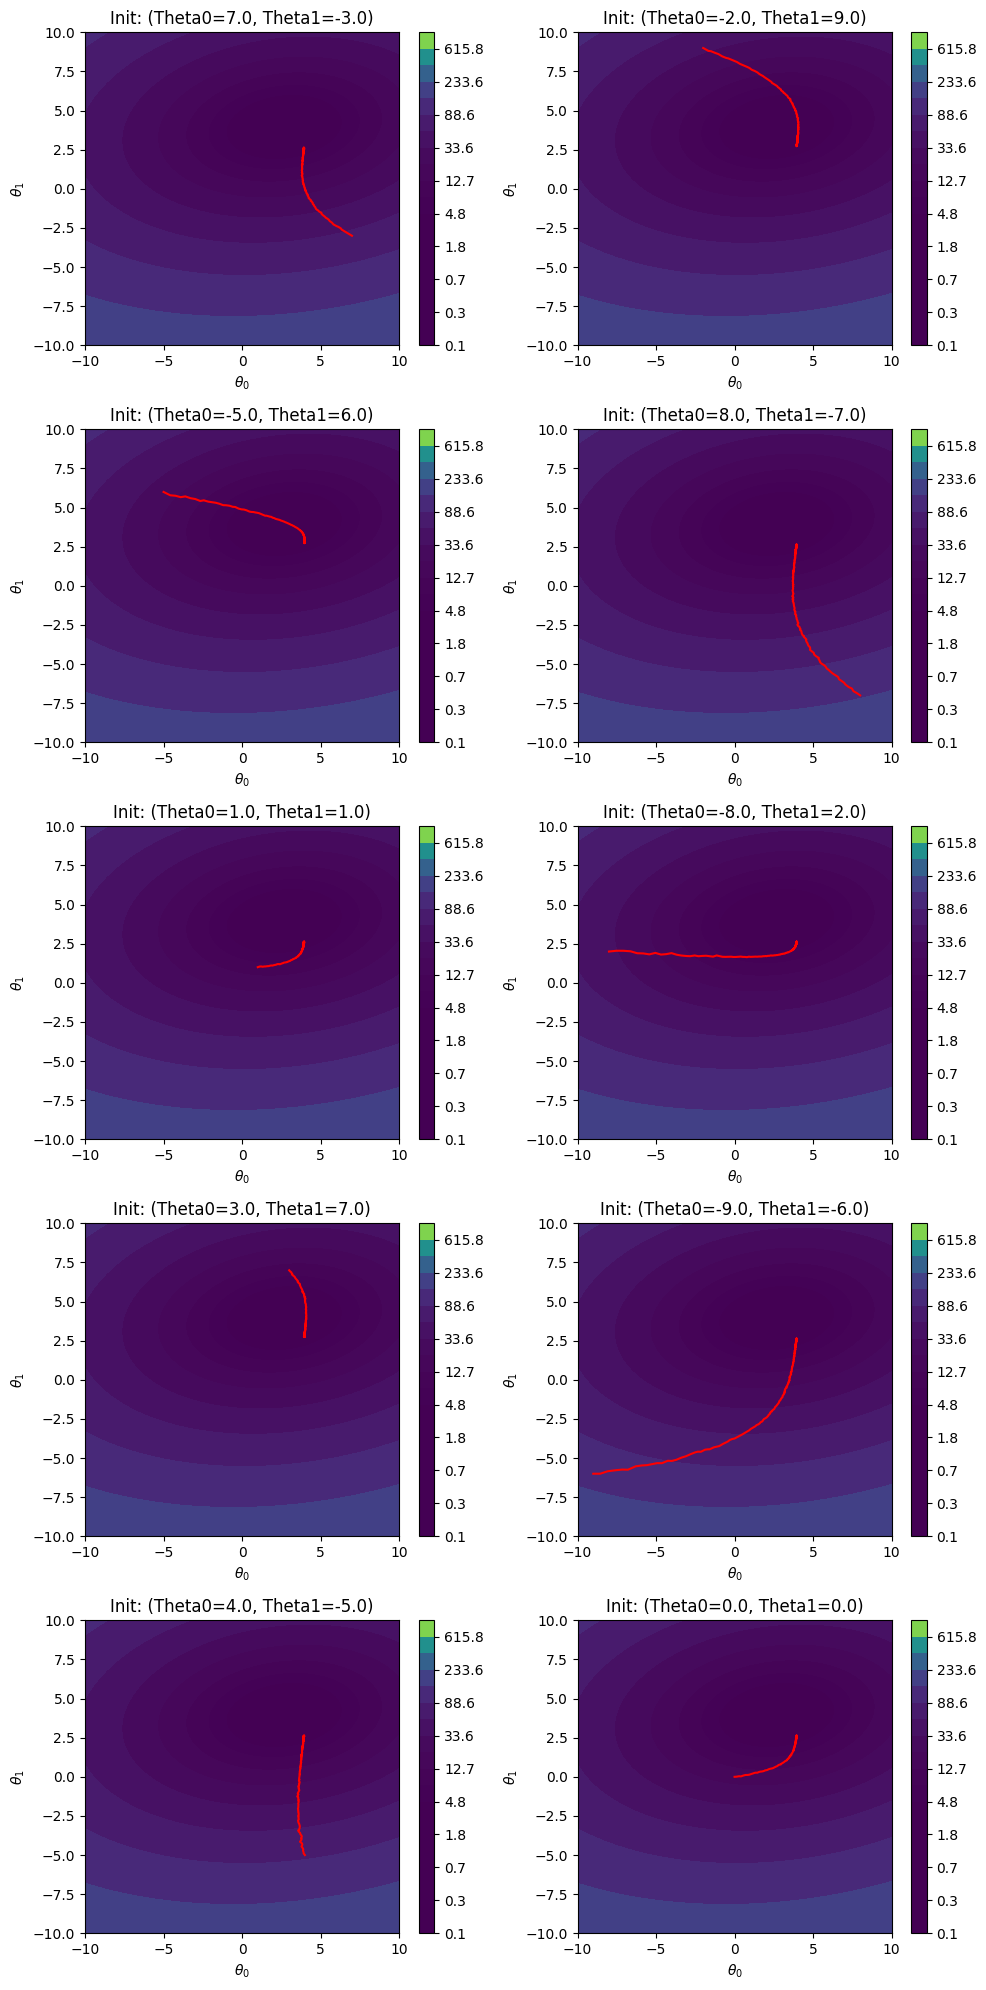

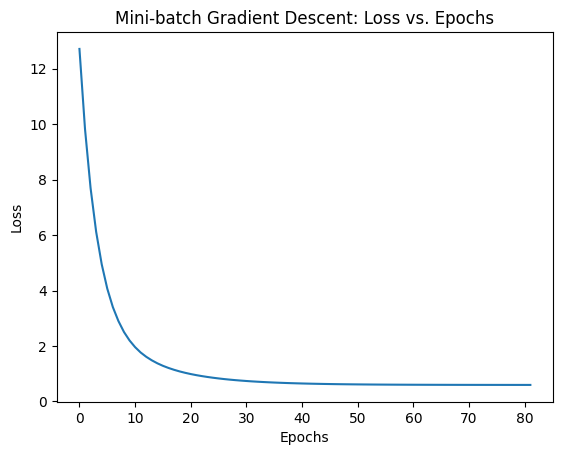

In [73]:
# Preparing the loss function contour plot
all_theta0 = np.linspace(-10, 10, 100)
all_theta1 = np.linspace(-10, 10, 100)
loss_vals = np.zeros((100, 100))

for i in range(100):
    for j in range(100):
        y_pred = linear_regression(x1, all_theta0[i], all_theta1[j])
        loss_vals[i, j] = loss_function(y_pred, y)

batch_size = 10
learning_rate = 0.02
epochs = 500

theta_tuples = [
    (7.0, -3.0), (-2.0, 9.0), (-5.0, 6.0), (8.0, -7.0), (1.0, 1.0),
    (-8.0, 2.0), (3.0, 7.0), (-9.0, -6.0), (4.0, -5.0), (0.0, 0.0)
]

epoch_count = []      
iteration_count = []  


fig, axes = plt.subplots(5, 2, figsize=(10, 20))
axes = axes.flatten()  

for idx, (theta0, theta1) in enumerate(theta_tuples):

    losses_mini = []
    theta0_values = [theta0]
    theta1_values = [theta1]
    
    iterations = 0  
    epoch_counter = 0  
    
    for epoch in range(epochs):
        epoch_counter += 1
        # Shuffle the dataset at the start of each epoch
        indices = np.random.permutation(num_samples)
        x_shuffled = x1[indices]
        y_shuffled = y[indices]
        
        for i in range(0, num_samples, batch_size):
            iterations += 1
            
            start = i
            end = min(start + batch_size, num_samples)  # ensuring that end doesn't go out of bound
            x_batch = x_shuffled[start:end]
            y_batch = y_shuffled[start:end]
            
            y_pred_batch = linear_regression(x_batch, theta0, theta1)
            
            # Calculating gradients
            error = y_pred_batch - y_batch
            grad_theta0 = (2 / len(y_batch)) * np.sum(error)
            grad_theta1 = (2 / len(y_batch)) * np.sum((error) * x_batch)
            
            # Updating theta values
            theta0 -= learning_rate * grad_theta0
            theta1 -= learning_rate * grad_theta1
            
            # Tracking theta values
            theta0_values.append(theta0)
            theta1_values.append(theta1)
        
        # Calculating loss after each epoch using the full dataset
        y_pred_full = linear_regression(x1, theta0, theta1)
        loss = loss_function(y, y_pred_full)
        losses_mini.append(loss)
        
        # Stopping condition
        if abs(loss - optimal_loss) < 0.001:
            break
    
    epoch_count.append(epoch_counter)
    iteration_count.append(iterations)
    
    print(f'Descent stopped at epoch = {epoch_counter}')    
    print(f'Final Theta0: {theta0:.4f}')
    print(f'Final Theta1: {theta1:.4f}')
    
    # Contour Plot
    contour_filled = axes[idx].contourf(all_theta0, all_theta1, loss_vals, levels=np.logspace(-1, 3, 20), cmap='viridis')
    fig.colorbar(contour_filled, ax=axes[idx])  # Adding color bar for each subplot

    # Plot mini-batch gradient descent path
    axes[idx].plot(theta0_values, theta1_values, 'r-', label='Mini-Batch Descent Path')
    axes[idx].set_xlabel(r'$\theta_0$')
    axes[idx].set_ylabel(r'$\theta_1$')
    axes[idx].set_title(f'Init: (Theta0={theta_tuples[idx][0]}, Theta1={theta_tuples[idx][1]})')


print("Average No. of epochs: ", np.average(epoch_count))
print("Average No. of iterations: ", np.average(iteration_count))

plt.tight_layout()
plt.show()

# Plot loss vs epochs
plt.plot(losses_mini)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Mini-batch Gradient Descent: Loss vs. Epochs")
plt.show()


#### Implementation of Stochastic Gradient Descent

Descent stopped at epoch = 10
Final Theta0: 3.9593
Final Theta1: 2.6549
Descent stopped at epoch = 10
Final Theta0: 3.9612
Final Theta1: 2.7206
Descent stopped at epoch = 6
Final Theta0: 3.9649
Final Theta1: 2.7321
Descent stopped at epoch = 10
Final Theta0: 3.9574
Final Theta1: 2.6509
Descent stopped at epoch = 8
Final Theta0: 3.9761
Final Theta1: 2.6787
Descent stopped at epoch = 9
Final Theta0: 3.9644
Final Theta1: 2.6591
Descent stopped at epoch = 10
Final Theta0: 3.9792
Final Theta1: 2.6945
Descent stopped at epoch = 16
Final Theta0: 3.9355
Final Theta1: 2.6874
Descent stopped at epoch = 11
Final Theta0: 3.9432
Final Theta1: 2.6573
Descent stopped at epoch = 13
Final Theta0: 3.9389
Final Theta1: 2.6964
Average No. of epochs:  10.3
Average No. of iterations:  412.0


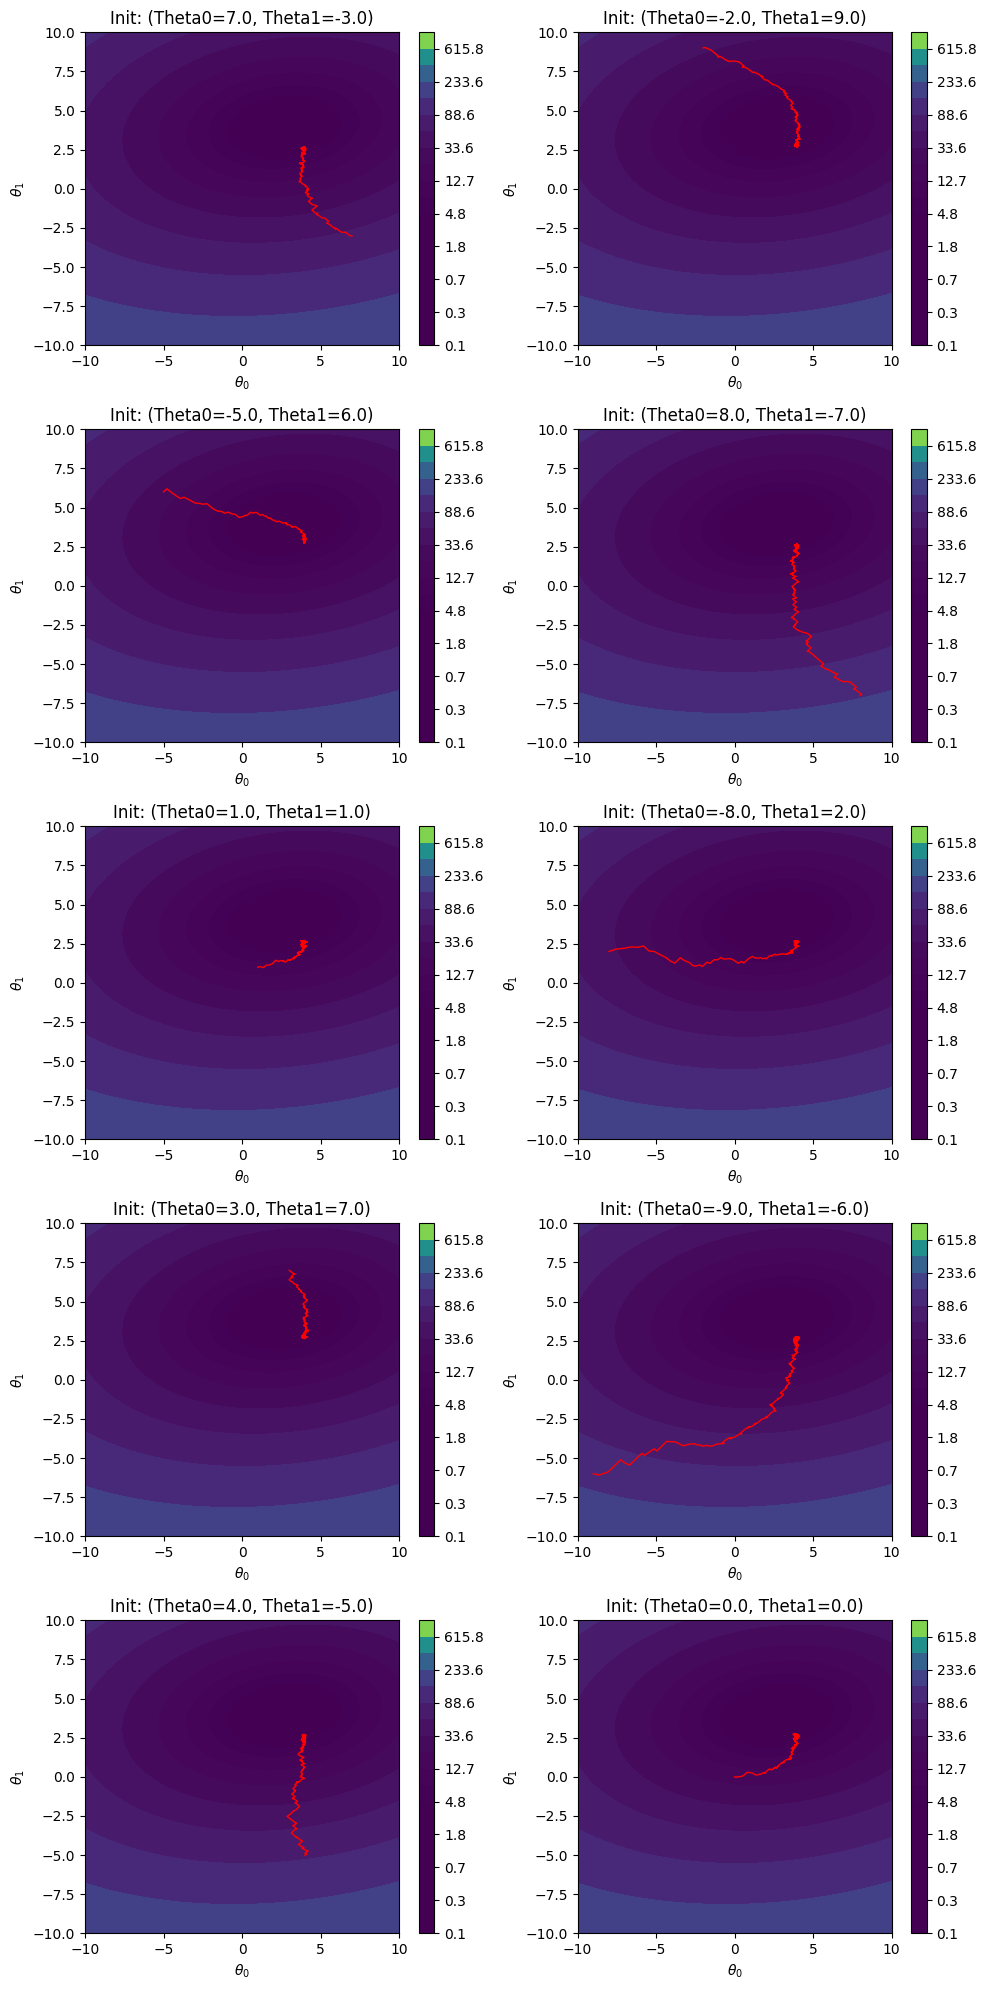

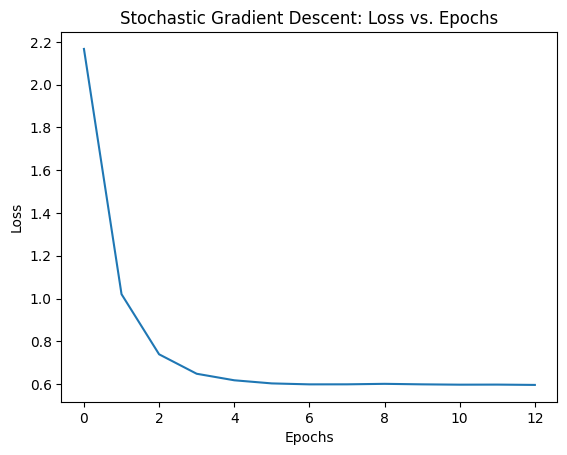

In [69]:
# Preparing the loss function contour plot
all_theta0 = np.linspace(-10, 10, 100)
all_theta1 = np.linspace(-10, 10, 100)
loss_vals = np.zeros((100, 100))

for i in range(100):
    for j in range(100):
        y_pred = linear_regression(x1, all_theta0[i], all_theta1[j])
        loss_vals[i, j] = loss_function(y_pred, y)

learning_rate = 0.02
epochs = 500

theta_tuples = [
    (7.0, -3.0), (-2.0, 9.0), (-5.0, 6.0), (8.0, -7.0), (1.0, 1.0),
    (-8.0, 2.0), (3.0, 7.0), (-9.0, -6.0), (4.0, -5.0), (0.0, 0.0)
]

epoch_count = []      
iteration_count = []  

fig, axes = plt.subplots(5, 2, figsize=(10, 20))
axes = axes.flatten()  

for idx, (theta0, theta1) in enumerate(theta_tuples):

    losses_SGD = []
    theta0_values = [theta0]
    theta1_values = [theta1]
    
    iterations = 0  
    epoch_counter = 0  

    for epoch in range(epochs):
        epoch_counter += 1
        # Shuffle dataset at the start of each epoch
        indices = np.random.permutation(num_samples)
        x_shuffled = x1[indices]
        y_shuffled = y[indices]
        
        for i in range(num_samples):
            iterations += 1
            xi = x_shuffled[i].item()
            yi = y_shuffled[i].item()

            # Make prediction
            y_pred_stoch = linear_regression(xi, theta0, theta1)
            
            # Calculating gradients
            error = y_pred_stoch - yi
            grad_theta0 = 2 * error
            grad_theta1 = 2 * error * xi
            
            # Updating the parameters
            theta0 -= learning_rate * grad_theta0
            theta1 -= learning_rate * grad_theta1
            
            # Tracking theta values 
            theta0_values.append(theta0)
            theta1_values.append(theta1)

        # Calculating loss after each epoch using the full dataset
        y_pred_full = linear_regression(x1, theta0, theta1)
        loss = loss_function(y, y_pred_full)
        losses_SGD.append(loss)
        
        # Stopping condition
        if abs(loss - optimal_loss) < 0.001:
            break
    
    epoch_count.append(epoch_counter)
    iteration_count.append(iterations)
    
    print(f'Descent stopped at epoch = {epoch_counter}')    
    print(f'Final Theta0: {theta0:.4f}')
    print(f'Final Theta1: {theta1:.4f}')
    
    # Contour Plot
    contour_filled = axes[idx].contourf(all_theta0, all_theta1, loss_vals, levels=np.logspace(-1, 3, 20), cmap='viridis')
    fig.colorbar(contour_filled, ax=axes[idx])  # Adding color bar for each subplot

    # Plotting Stochastic Gradient Descent path
    axes[idx].plot(theta0_values, theta1_values, 'r-', linewidth=1, label='SGD Path')
    axes[idx].set_xlabel(r'$\theta_0$')
    axes[idx].set_ylabel(r'$\theta_1$')
    axes[idx].set_title(f'Init: (Theta0={theta_tuples[idx][0]}, Theta1={theta_tuples[idx][1]})')


print("Average No. of epochs: ", np.average(epoch_count))
print("Average No. of iterations: ", np.average(iteration_count))

plt.tight_layout()
plt.show()

# Plot loss vs epochs
plt.plot(losses_SGD)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Stochastic Gradient Descent: Loss vs. Epochs")
plt.show()


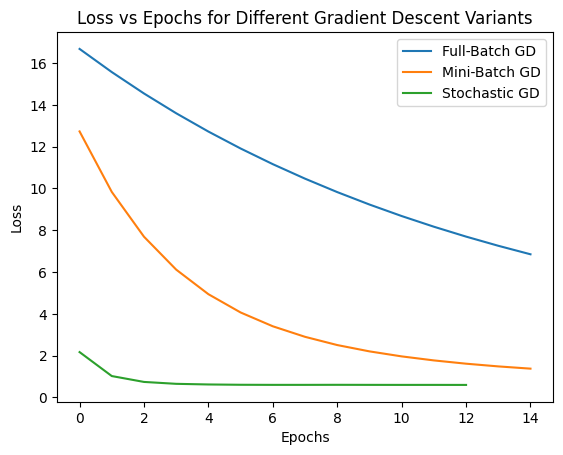

In [70]:
plt.plot(losses_full[:15], label='Full-Batch GD')
plt.plot(losses_mini[:15], label='Mini-Batch GD')
plt.plot(losses_SGD[:15], label='Stochastic GD')

plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss vs Epochs for Different Gradient Descent Variants")

plt.legend()
plt.show()


From the above plot we can see that Full-batch Gradient Descent takes the longest time to converge. The main reasons behind are:
- The loss is calculated only after end of an epoch.
- Parameters are updated less frequently due the way loss is calculated in this variation of Gradient Descent.

On the other hand. Stochastic Gradient Descent calculates the loss for each data point and updates the parameters. So for lesser amount of epochs, it updates the parameters more frequently. But the drawback of this method is that descent's locus turns out to be noisy.

Mini-batch Gradient descent is the middle-ground and takes the positives from both of the above variations. It has the smooth descent path as well as it takes lesser number of epochs to converge.

### Q4

#### Implementation of Gradient Descent with Momentum

Epoch 1:
  Theta0: 4.152697855895735, Theta1: -0.08426976914294733
  Gradient Theta0: 1.004845368741604, Gradient Theta1: -0.059585826306221626
  Momentum Theta0: -0.019654231828895377, Momentum Theta1: 0.0049801315128787
  Loss: 3.1489398074267836

Epoch 2:
  Theta0: 3.733660870677979, Theta1: 1.2600176863684367
  Gradient Theta0: 2.9349968989975608, Gradient Theta1: -1.6148582924086408
  Momentum Theta0: -0.029878911497759876, Momentum Theta1: 0.05948789844084269
  Loss: 1.229634446427955

Epoch 3:
  Theta0: 3.809729830393704, Theta1: 1.949107531424511
  Gradient Theta0: -1.2836907682104783, Gradient Theta1: -0.14745166045271574
  Momentum Theta0: 0.015319531748693927, Momentum Theta1: 0.012489521310845075
  Loss: 0.7679829273485252

Epoch 4:
  Theta0: 3.8601998074520414, Theta1: 2.3137664429878564
  Gradient Theta0: -2.6838867998164693, Gradient Theta1: 1.331475168953115
  Momentum Theta0: 0.046801288529851125, Momentum Theta1: -0.022906688803856597
  Loss: 0.6412294801229185

Epoch

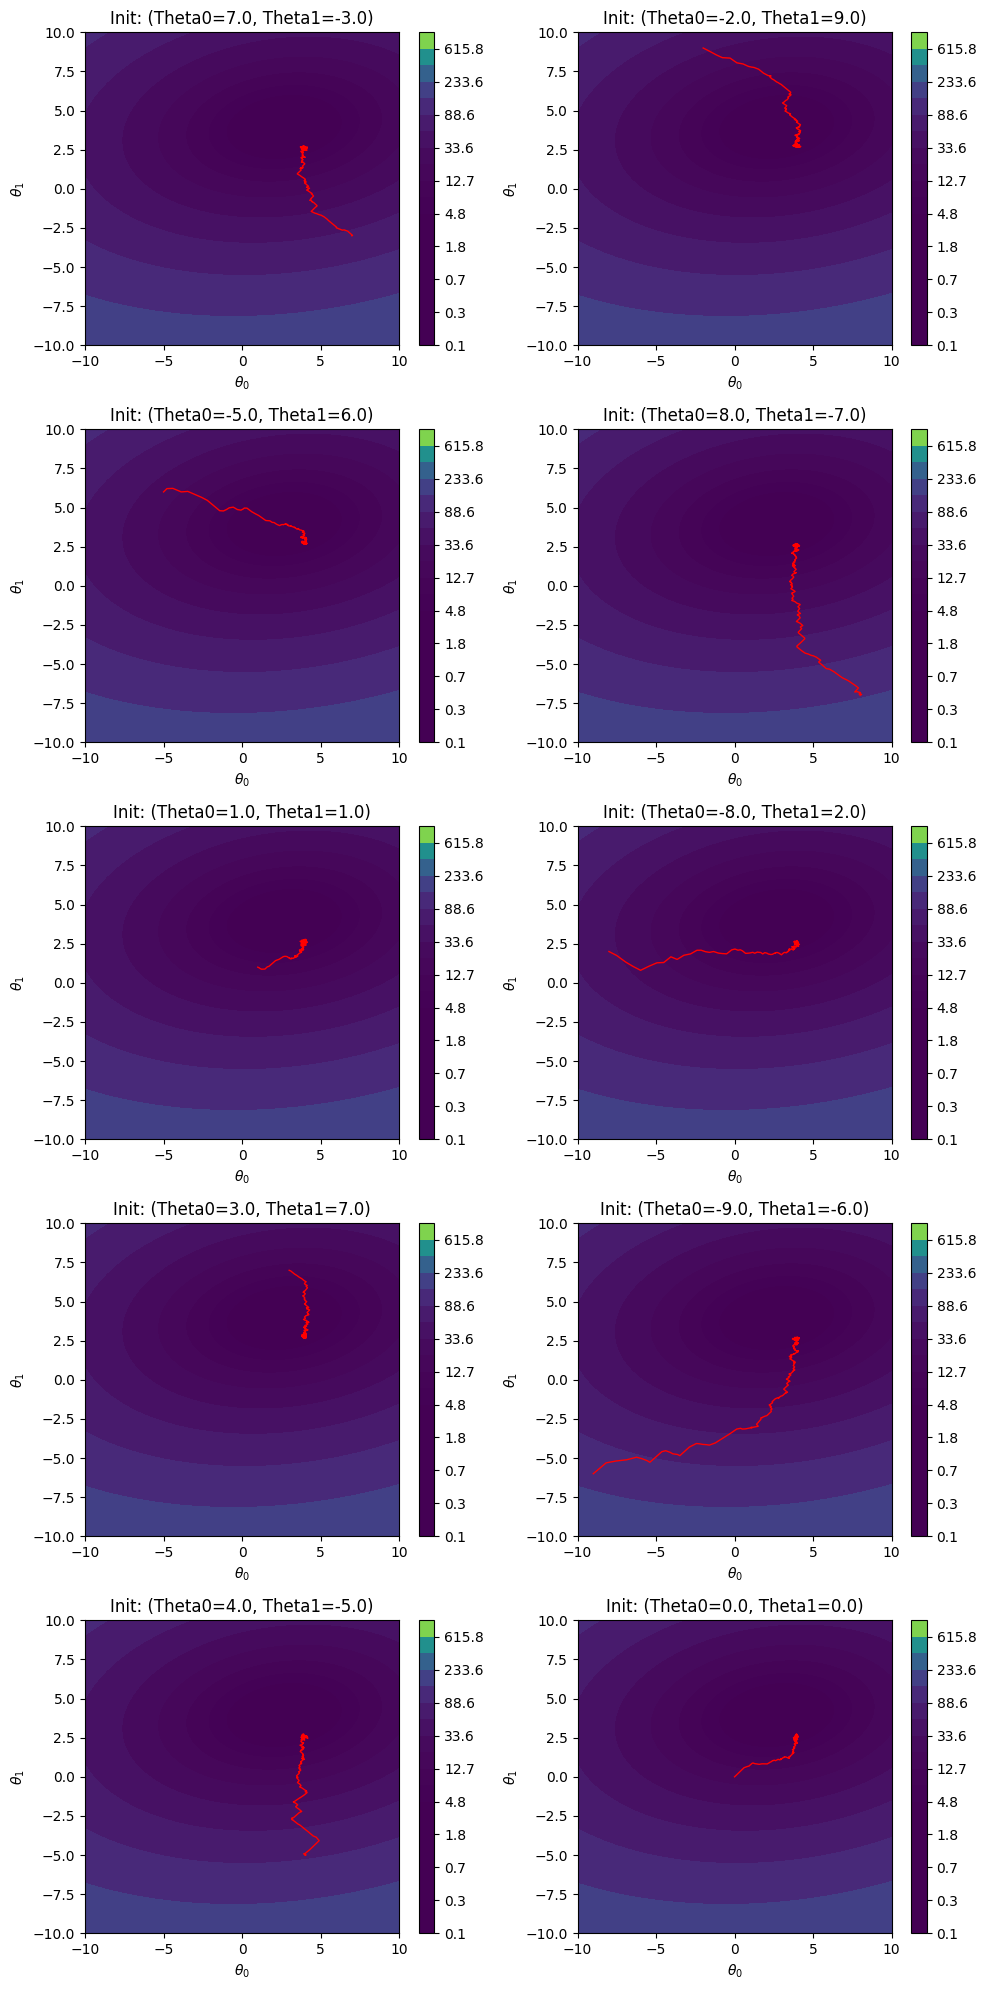

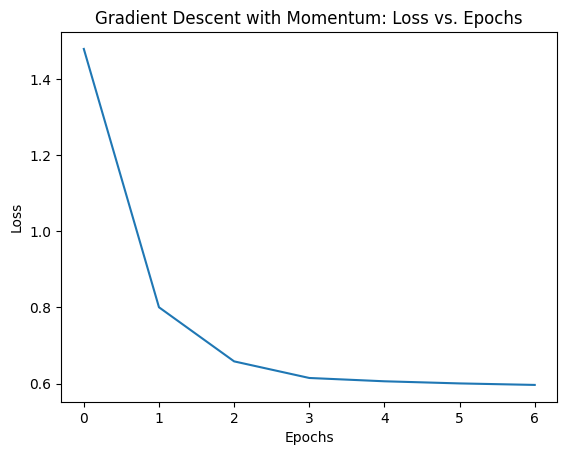

In [71]:
# Preparing the loss function contour plot
all_theta0 = np.linspace(-10, 10, 100)
all_theta1 = np.linspace(-10, 10, 100)
loss_vals = np.zeros((100, 100))


for i in range(100):
    for j in range(100):
        y_pred = linear_regression(x1, all_theta0[i], all_theta1[j])
        loss_vals[i, j] = loss_function(y, y_pred)
        
        
theta_tuples = [
    (7.0, -3.0), (-2.0, 9.0), (-5.0, 6.0), (8.0, -7.0), (1.0, 1.0),
    (-8.0, 2.0), (3.0, 7.0), (-9.0, -6.0), (4.0, -5.0), (0.0, 0.0)
]

epoch_count = []
iteration_count = []
epochs = 500  
momentum = 0.2  
learning_rate = 0.02  

fig, axes = plt.subplots(5, 2, figsize=(10, 20))
axes = axes.flatten()  

for idx, (theta0, theta1) in enumerate(theta_tuples):

    losses_momentum = []
    theta0_values = [theta0]
    theta1_values = [theta1]
    
    # Initialize velocity for both parameters
    v_theta0 = 0
    v_theta1 = 0
    iterations = 0  
    epoch_counter = 0  

    for epoch in range(epochs):
        epoch_counter += 1
        # Shuffle dataset at the start of each epoch
        indices = np.random.permutation(num_samples)
        x_shuffled = x1[indices]
        y_shuffled = y[indices]

        for i in range(num_samples):
            iterations += 1
            xi = x_shuffled[i].item()
            yi = y_shuffled[i].item()

            # Make prediction
            y_pred_momentum = linear_regression(xi, theta0, theta1)

            # Calculating gradients
            error = y_pred_momentum - yi
            grad_theta0 = 2 * error
            grad_theta1 = 2 * error * xi

            # Updating velocities using momentum
            v_theta0 = momentum * v_theta0 - learning_rate * grad_theta0
            v_theta1 = momentum * v_theta1 - learning_rate * grad_theta1

            # Update parameters with momentum
            theta0 += v_theta0
            theta1 += v_theta1

            # Tracking theta values
            theta0_values.append(theta0)
            theta1_values.append(theta1)

        # Calculating loss after each epoch using the full dataset
        y_pred_full = linear_regression(x1, theta0, theta1)
        loss = loss_function(y, y_pred_full)
        losses_momentum.append(loss)

        # Printing current values of gradients, thetas, and momentum at the end of each epoch
        print(f'Epoch {epoch_counter}:')
        print(f'  Theta0: {theta0}, Theta1: {theta1}')
        print(f'  Gradient Theta0: {grad_theta0}, Gradient Theta1: {grad_theta1}')
        print(f'  Momentum Theta0: {v_theta0}, Momentum Theta1: {v_theta1}')
        print(f'  Loss: {loss}\n')

        # Stopping condition
        if abs(loss - optimal_loss) < 0.001:
            break

    epoch_count.append(epoch_counter)
    iteration_count.append(iterations)
    
    print(f'Descent stopped at epoch = {epoch_counter}')
    print(f'Final Theta0: {theta0}')
    print(f'Final Theta1: {theta1}\n')

    # Contour plot
    contour_filled = axes[idx].contourf(all_theta0, all_theta1, loss_vals, levels=np.logspace(-1, 3, 20), cmap='viridis')
    fig.colorbar(contour_filled, ax=axes[idx])  # Adding color bar for each subplot

    # Plotting Gradient Descent path
    axes[idx].plot(theta0_values, theta1_values, 'r-', linewidth=1, label='Momentum Path')
    axes[idx].set_xlabel(r'$\theta_0$')
    axes[idx].set_ylabel(r'$\theta_1$')
    axes[idx].set_title(f'Init: (Theta0={theta_tuples[idx][0]}, Theta1={theta_tuples[idx][1]})')


print("Average No. of epochs: ", np.average(epoch_count))
print("Average No. of iterations: ", np.average(iteration_count))
plt.tight_layout()
plt.show()

# Plot loss vs epochs for momentum-based gradient descent
plt.plot(losses_momentum)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Gradient Descent with Momentum: Loss vs. Epochs")
plt.show()


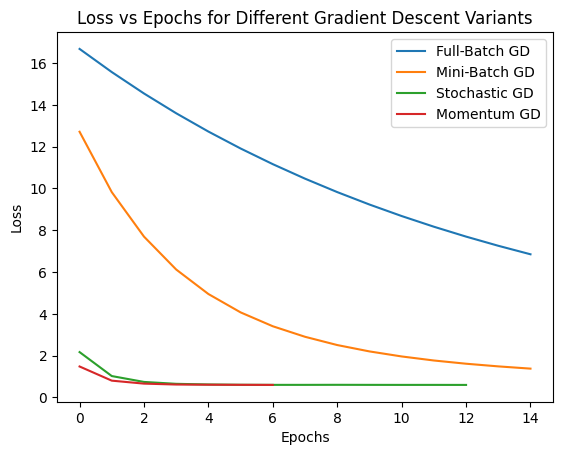

In [74]:
plt.plot(losses_full[:15], label='Full-Batch GD')
plt.plot(losses_mini[:15], label='Mini-Batch GD')
plt.plot(losses_SGD[:15], label='Stochastic GD')
plt.plot(losses_momentum[:15], label='Momentum GD')

plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss vs Epochs for Different Gradient Descent Variants")

plt.legend()
plt.show()

#### Observations

- We can see that Gradient Descent with Momentum is even faster than SGD.
- This can be due to the fact that we are giving a velocity component to the descent.
- This extra term considers the momentum of the descent in the previous iteration and helps pushing the descent even further, which helps in faster convergence.
- Also sudden changes in the direction will affect this variation less because, the momentum from the previous iteration can help reduce this.